# Creating a Custom Colormap

To address this issue, the color scale's maximum value was reset to the actual maximum of the dataset. Additionally, a custom color map was created, which accentuates differences at the lower end of the scale, taking into account the high diversity of values in this range.

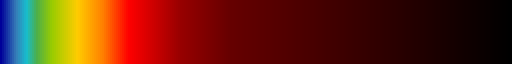

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from IPython import display
import time

tab10 = sns.color_palette("tab10")
set1 = sns.color_palette("Set1")
colors = ["#000099", set1[1], tab10[9], set1[2], "#99cc00", "#ffcc00", set1[4], "#ff0000", "#cc0000", "#990000", "#660000", "#000000"]
positions = [0.0, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.45, 1.0]
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', list(zip(positions, colors)))
custom_cmap

KeyboardInterrupt: 

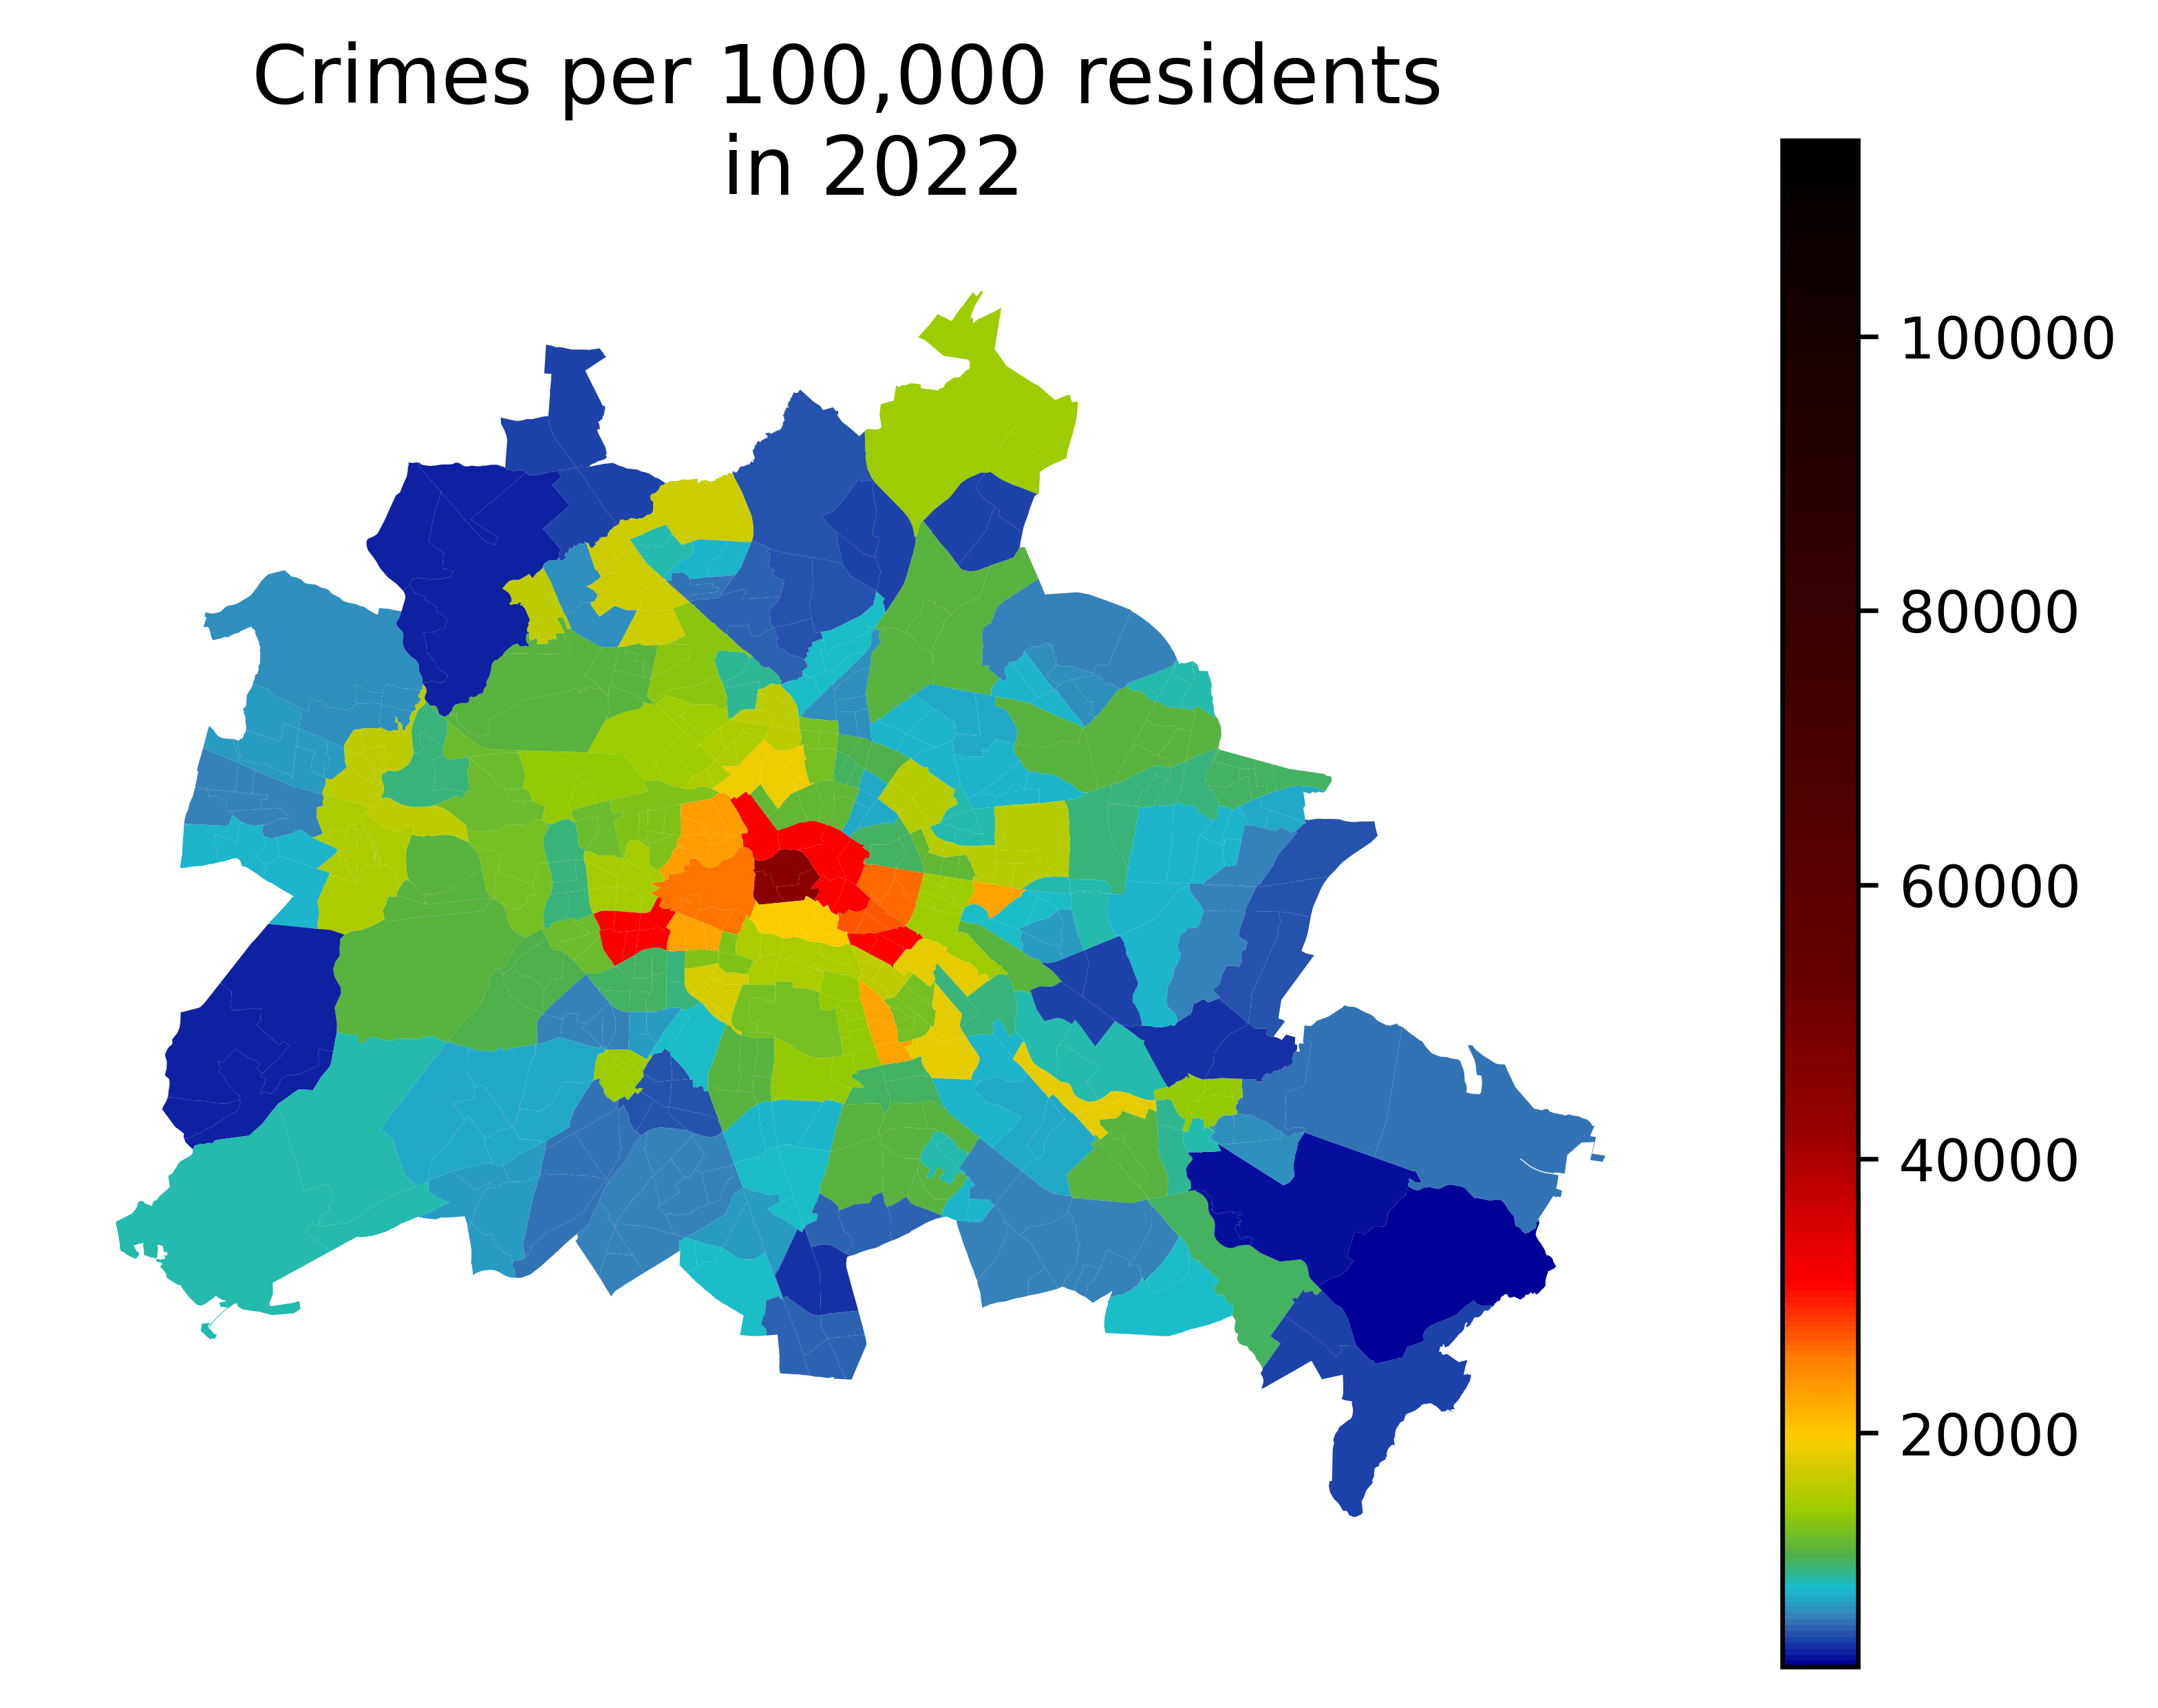

In [2]:
#import os

#output_dir = "output_heatmaps"  # Create a directory to save the output heatmaps
#os.makedirs(output_dir, exist_ok=True)

crime_dev = pd.read_pickle("../data/05_kriminalitaet_2013_bis_2022_hz.pkl")

crime_dev["Straftaten \n-insgesamt-"] = crime_dev["Straftaten \n-insgesamt-"].astype(int)

max_value = max(crime_dev["Straftaten \n-insgesamt-"])
min_value = min(crime_dev["Straftaten \n-insgesamt-"])
vmin, vmax = min_value, max_value

for year in range(2013, 2023):
    year_df = crime_dev[crime_dev['Year'] == year]
    
    straftaten_gesamt_df = year_df[["PLR_NAME", "geometry", "Straftaten \n-insgesamt-"]]
    straftaten_gesamt_df = straftaten_gesamt_df.rename(columns={"Straftaten \n-insgesamt-": "Crimes per 100.000 residents",
                                                                "PLR_NAME": "Area"})
    straftaten_gesamt_df = gpd.GeoDataFrame(straftaten_gesamt_df, geometry="geometry")
    
    fig, ax = plt.subplots()
    straftaten_gesamt_df.plot(column="Crimes per 100.000 residents", cmap=custom_cmap, legend=True,
                              ax=ax, vmin=vmin, vmax=vmax, edgecolor='None')

    #ax.set_title(f"Crimes per 100,000 residents \nper district in {year}", fontsize=20, color="blue", fontweight="bold")
    ax.set_title(f"Crimes per 100,000 residents \n in {year}", fontsize=14)


    ax.set_axis_off()
    plt.gcf().set_dpi(600)
    
    #output_filename = os.path.join(output_dir, f"heatmap_{year}.png")
    #plt.savefig(output_filename, dpi=500)  # Save the figure as an image

    display.display(plt.gcf())
    display.clear_output(wait=True)

    time.sleep(2)

    plt.close(fig)


```{figure} figures/heatmap_final.gif
---
height: 600px
name: fig:crime-dev-final
---
Temporal development (2013-2022) of crimes per 100,000 residents
per Berlin LOR sub-district - heatmap with custom colormap and default colormap scale range
```